## Seq2Seq by Ilyaaaaa!!!! 
---
### Abstract
- DNNs work well on large labeled training sets, they cannot be used to map sequences to sequences.
- The method used in the paper, uses a **Multi-layered Long Short Term Memory (LSTM)** to map the input sequence to a fixed vector of dimensionality, and the nanother deep LSTM to decode the target sequence from the vector.
- The main result is that on an English to French translation task from the WMT' 14 dataset, the translations produced by the LSTM achieve a BLEU score of 34.8 on the entire test set, where the LSTM's BLEU score was was penalized on out-of-vocabulary words.
  - Context on BLEU: Bilingual Evaluation Understudy score is a metric for evaluating the quality of machine-translated text compared to human reference translations.
  - Formula:
    $$BELU = Brevity Penalty * exp (\sum_{n=1}^N w_n log p_n) $$
  - $ p_n $ is the precision for n-grams,
  - $ w_n $ are weights (typically equal for 1-gram to 4-gram)
  - Brevity penalty discourages overly short extensions
- The LSTM also learned a sensible phase and sentence representations that are sensitive to word order and relatively invariant to the active and passive voice.
- The authors found that reversing the order of words in all source sentences (but not target sentence) improved the LSTM's performance markedly, because doing so introduced many short term dependencies between the source and the target sentence which made the optimization problem easier.
---
### Introduction
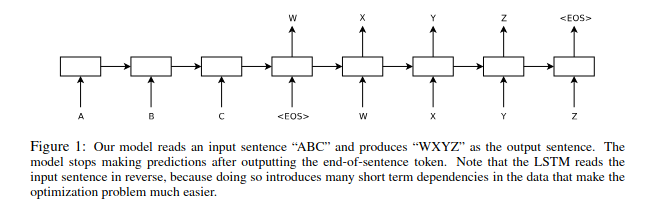
- DNNs are extemely powerful machine learning models that achieve excellent performancef on difficult problems.
- DNNs are powerful because they can perform arbitary parallel computation for a modest number of steps.
- Despite their flexibility and powerm DNNs can only be applied to problems whose inputs and targets can be sensibly encoded with vectors of fixed dimensionality.
- Since many important problems are best expressed with sequences whose lengths are not known-a-priori, so it is a significant limitation.
- **The Idea**: Authors use one LSTM to read the input sequence, one timestep at a time, to obtain large fixed-dimensional vector representation. and then to use another LSTM to extract the output sequence from that vector.
- The second LSTM is essentailly a recurrent neural network language model except that it is conditioned on the input sequence. 
--- 
### The Model
- This section of the paper describes how RNNs and LSTMs can be used for seq2seq learning, particulary in tasks where input and output sequences have different lengths and complex dependencies.
1. Standard RNNs
   - RNNs process sequences iteratively using hidden states.
   - They struggle with long-term dependecies due to vanoshing/exploding gradients.
2. LSTMs for Sequence Learning
   - LSTMs address long range dependencies better than standard RNNs.
   - They estimate the conditional probibility of an output sequence $(y_1,....,y'_T)$ given an input sequence $(x_1,....,x_T)$.
   - The final hidden state of the input sequence is used as a context vector v, which helps in generating the output sequence.
3. Probability Formulation
   - The LSTM models the probability of the output sequence as:
$$ p(y_1, \dots, y_{T'} | x_1, \dots, x_T) = \prod_{t=1}^{T'} p(y_t | v, y_1, \dots, y_{t-1}) $$
4. Key Model Enhancements
   - Two LSTMs: One for encoding input, another for decoding output.
   - Deep LSTMs: Deeper LSTMs significantly improve performance.
   - Mapping Trick: The model encourages outputs to be close to their corresponding inputs, which improves training efficiency.
---
### Mathematical Explanation
#### 1. RNN Update Equations
A standard **RNN** updates its hidden state $( h_t )$ as follows:

$$
h_t = \text{sigm}(W^{hx} x_t + W^{hh} h_{t-1})
$$

$$
y_t = W^{yh} h_t
$$

where:
- $( h_t )$ is the hidden state at time step $( t )$.
- $( x_t )$ is the input at time step $( t )$.
- $( W^{hx} ), ( W^{hh} )$, and $( W^{yh} )$ are weight matrices.
- **sigm** is the activation function (usually tanh or sigmoid).

---

#### 2. LSTM Conditional Probability Formula
The model predicts an output sequence $( (y_1, ..., y_{T'}) )$ given an input sequence $( (x_1, ..., x_T) )$ by computing:

$$
p(y_1, \dots, y_{T'} | x_1, \dots, x_T) = \prod_{t=1}^{T'} p(y_t | v, y_1, \dots, y_{t-1})
$$

This means:
- The probability of the entire output sequence is the **product of probabilities** of each word \( y_t \).
- Each word \( y_t \) depends on:
  - The encoded **context vector** ( v ) (final hidden state of the input LSTM).
  - All previous outputs $( (y_1, ..., y_{t-1}) )$.

---

#### 3. Softmax Over Vocabulary
Each probability $( p(y_t | v, y_1, ..., y_{t-1}) )$ is computed using a **softmax function** over all words in the vocabulary:

$$
p(y_t | v, y_1, \dots, y_{t-1}) = \frac{\exp(W h_t)}{\sum_{w \in V} \exp(W h_t)}
$$

where:
- $( h_t )$ is the LSTM hidden state at time $( t )$.
- $( W )$ is the output weight matrix.
- The denominator ensures that probabilities sum to 1.

---

#### 4. End-of-Sentence Token (\<EOS\>)
- The sequence ends when the model generates a special token **\<EOS>
- This allows handling variable-length output sequences.
---
### Experiments 
1. **Dataset Details**:
- We used the WMT'14 English to French dataset. We trained our models on a subset of 12M sentences consisting of 348M French words and 304M English words.
2. **Decoding and Rescoring**:
- Once training is complete, we produce translation by finding the most likely translation according to the LSTM
  $$ T = argmaxp(T/S)$$
- We search for most likely translation using a simple left to right beam search decoder which maintains a small number B of partial hypotheses, where a partial hypothesis is a prefix of some translation.
- As soon as the "" symbol is appended to a hypothesis, it is removed from the beam and is added to the set of complete hypotheses.
- Beam search is used to traverse the tree of sequence predictions to create a number of hypotheses, and then available hypotheses that get created can get scored and selected from.
3. **Reversing the Source Sentences**:
  - We discovered thaat th LSTM learns much better when the source sentence is reversed.
  - While we do not have a complete explanation to this phenomenon, we believe that it is caused by the introduction of many short term dependencies to the dataset.
  - Normally, when we concatenate a source sentence with a target sentence, each word in the source sentence is far from its corresponding word in the target sentence. As a result, the problem has a large 'minimal time lag'.
  - By revresing the sentence order, this 'minimal time lag' is reduced, which could impact backpropagation.
  - Backpropagation has an easier time 'establishing communication' between the source sentence and the target sentence, which in turn results in substantially improved overall performance.
--- 
### Experimental Results 
- While the decoded translations of the LSTM ensemble do not outperform the best WMT'14 system, it is the first time that a pure neural translation system outperforms a phrase based SMT baseline on a large scale MT task by a sizeable margin, despite its inability to handle out-of-vocab words.
- 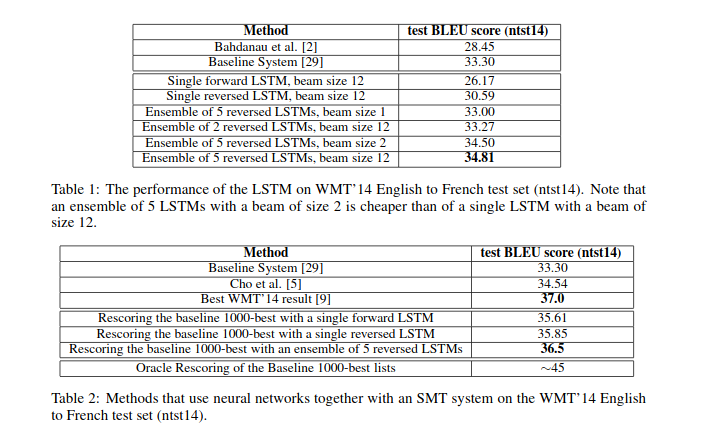
---
### Model Analysis 
- One of the attractive features of our model is ability to turn a sequence of words into a vector of fixed dimensionality. 
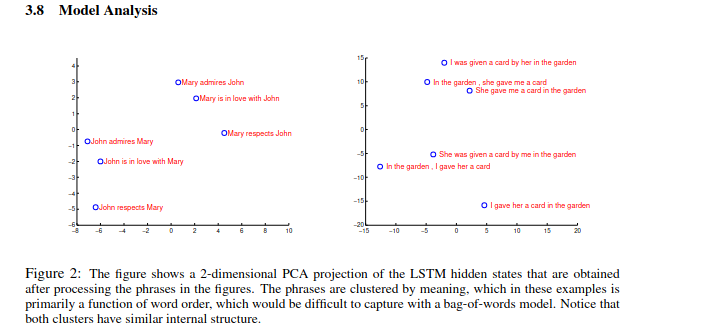
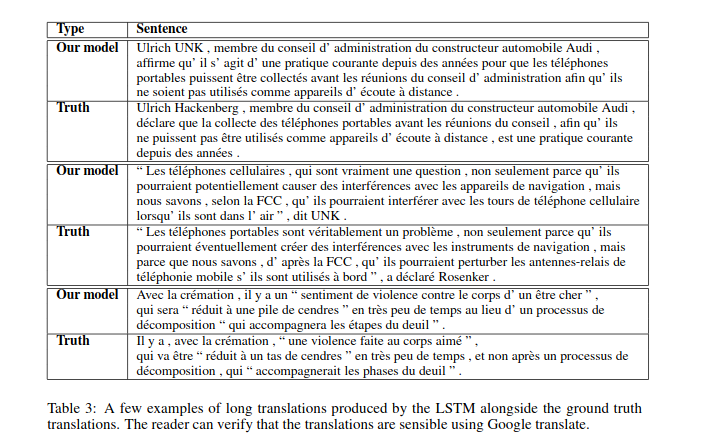
---
### Conclusion
    - In this work, we showed that a large deep LSTM, that has a limited vocabulary and that makes almost no assumption about problem structure can outperform a standard SMT-based system whose vocabulary is unlimited on a large-scale MT task.

    - We were surprised by the extent of the improvement obtained by reversing the words in the source sentences. We conclude that it is important to find a problem encoding that has the greatest number of short term dependencies, as they make the learning problem much simpler.

    - We were also surprised by the ability of the LSTM to correctly translate very long sentences.

    Most importantly, we demonstrated that a simple, straightforward and a relatively unoptimized approach can outperform an SMT system, so further work will likely lead to even greater translation accuracies.


- Reference: [Adam-Maj-Notes](https://github.com/adam-maj/deep-learning/blob/main/03-sequence-modeling/05-seq2seq/03-seq2seq.ipynb)